Robert Steward
CS 7641 Assignment 2
Sudoku problem implementation 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

In [28]:
#SA

bas=[1,2,3,4,5,6,7,8,9]

def indices(input1):
    arr = np.array(input1)
    positions = np.where(arr == 0)[0]
    return list(positions)

def build_free(input1):  #builds a 2-d list with all the positions that can be changed
    output=[]
    for i in range(9):
        zeros=indices(input1[i])
        output.append(zeros)
    return output    
        
def random_intialize(input):
    output=[]
    zero_pos=build_free(input)
    for i in range(9):
        temp=[]
        for k in range(len(input[i])):
            temp.append(input[i][k])
        output.append(temp)                
        diff = list(set(bas)-(set(input[i])))
        for j in range(len(diff)):
            val=random.choice(diff)
            diff.remove(val)
            output[i][zero_pos[i][j]]=val
    return output    


def max_flips(input1):
    flips=build_free(input1)
    count=0
    for i in range(9):
        count=count+(math.floor(len(flips[i])/2))
    return count 

def flip_random(input1,zeros):
    output=[]
    for i in range(9):
        temp=[]
        for j in range(9):
            temp.append(input1[i][j])
        output.append(temp)    
    rand_row_index=random.randint(0,8)
    rand_row=[]
    for j in range(len(zeros[rand_row_index])):
        rand_row.append(zeros[rand_row_index][j])      
    if(len(rand_row)>0):
        first=random.choice(rand_row)
        rand_row.remove(first)
        second=random.choice(rand_row)
        temp1=output[rand_row_index][first]
        temp2=output[rand_row_index][second]
        output[rand_row_index][first]=temp2
        output[rand_row_index][second]=temp1
    return output    

def score(input1):
    score=0
    for i in range(3):
        ypos_base=3*i
        xpos_base=0
        for k in range(3):
            array=[]
            xpos_base=3*k
            for j in range(3):
                array.append(input1[ypos_base+j][xpos_base])
                array.append(input1[ypos_base+j][xpos_base+1])
                array.append(input1[ypos_base+j][xpos_base+2])
            diff=list(set(bas)-(set(array)))
            score=score+len(diff)
    ypos_base=0
    xpos_base=0
    for i in range(3):
        ypos_base=i
        for k in range(3):
            xpos_base=k
            array=[]
            array.append(input1[ypos_base][xpos_base])
            array.append(input1[ypos_base][xpos_base+3])
            array.append(input1[ypos_base][xpos_base+6])
            array.append(input1[ypos_base+3][xpos_base])
            array.append(input1[ypos_base+3][xpos_base+3])
            array.append(input1[ypos_base+3][xpos_base+6])
            array.append(input1[ypos_base+6][xpos_base])
            array.append(input1[ypos_base+6][xpos_base+3])
            array.append(input1[ypos_base+6][xpos_base+6])
            diff=list(set(bas)-(set(array)))
            score=score+len(diff)
    return score
    
    
        
def print_puzz(input1):
    output=input1
    pos1=0
    for i in range(3):
        print("-----------------------")
        ypos_base=3*i
        row="|"
        xpos_base=0
        for k in range(3):
            xpos_base=3*k
            for j in range(3):
                row=row+" "+str(output[ypos_base+j][xpos_base])+" "+str(output[ypos_base+j][xpos_base+1])+" "+str(output[ypos_base+j][xpos_base+2])+"|"
            print(row)
            row="|"


In [31]:
#SA

one=[0,7,0,0,6,0,2,0,0]
two=[0,2,0,0,0,0,8,0,0]
thr=[0,4,6,8,9,0,7,1,5]
fur=[0,8,4,7,1,0,0,0,0]
fiv=[0,9,7,0,0,0,1,3,0]
six=[0,0,0,0,5,9,4,8,0]
sev=[6,9,7,0,5,8,4,3,0]
eit=[0,0,2,0,0,0,0,8,0]
nin=[0,0,8,0,6,0,0,7,0]

puzzle=[one,two,thr,fur,fiv,six,sev,eit,nin]
zeros=build_free(puzzle)

puzz1=random_intialize(puzzle)
print_puzz(puzz1)


-----------------------
| 5 7 4| 1 2 6| 3 4 6|
| 8 6 1| 7 3 5| 8 9 2|
| 2 3 9| 8 9 4| 7 1 5|
-----------------------
| 3 8 4| 4 9 7| 2 6 1|
| 7 1 6| 6 8 5| 3 5 9|
| 9 2 5| 1 3 2| 4 8 7|
-----------------------
| 6 9 7| 9 6 2| 2 3 8|
| 1 5 8| 5 1 7| 9 6 1|
| 4 3 2| 4 8 3| 4 7 5|


In [92]:
puzz1=random_intialize(puzzle)
print_puzz(puzz1)
print("start score ",score(puzz1))
      
def SA(puzz,iterations):
    score1=score(puzz)
    T=5
    for i in range(iterations):
        proposed=flip_random(puzz,zeros)
        score2=score(proposed)
        if score2<score1:
            score1=score2
            puzz=proposed
        elif math.log(np.random.uniform())*T<(score1-score2):
            puzz=proposed
            score1=score2
        if score2==0:
            break
        T=T*(iterations-i)/iterations   
    return score(puzz)   
    #print(score(puzz))
    #print_puzz(puzz)

score_array=[] 
time_array=[]
for i in range(100):
    tic = time.perf_counter()
    a=SA(puzz1,100000)
    score_array.append(a)
    toc = time.perf_counter()
    time_array.append(toc - tic)
print(score_array)    

-----------------------
| 1 7 5| 4 2 1| 3 4 6|
| 9 6 8| 5 6 3| 8 9 2|
| 2 3 4| 8 9 7| 7 1 5|
-----------------------
| 9 8 4| 5 9 7| 1 3 7|
| 7 1 6| 8 6 4| 6 5 9|
| 3 5 2| 1 3 2| 4 8 2|
-----------------------
| 6 9 7| 6 9 2| 3 2 8|
| 1 5 8| 5 4 1| 5 6 4|
| 4 3 2| 3 8 7| 9 7 1|
start score  41
[0, 0, 5, 0, 3, 2, 2, 3, 4, 2, 5, 0, 3, 0, 0, 0, 3, 2, 0, 0, 3, 5, 5, 0, 3, 0, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 3, 0, 3, 4, 0, 0, 0, 4, 0, 3, 0, 0, 2, 0, 3, 0, 3, 2, 0, 0, 0, 0, 5, 2, 2, 0, 3, 5, 0, 0, 3, 0, 3, 3, 0, 7, 0, 2, 3, 2, 0, 0, 0, 4, 0, 3, 0, 3, 5, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 5, 5, 0, 0, 2]


In [95]:
score_array.count(0)
sum(time_array)/100

2.00840379100031

In [87]:
#RHC

def RHC(puzz,iterations):
    score1=score(puzz)
    T=10
    for i in range(iterations):
        proposed=flip_random(puzz,zeros)
        score2=score(proposed)
        if score2<score1:
            score1=score2
            puzz=proposed
        if score2==0:
            break
        T=T*(iterations-i)/iterations   
    return score(puzz)   

score_array=[] 
time_array=[]
for i in range(100):
    tic = time.perf_counter()
    a=SA(puzz1,100000)
    score_array.append(a)
    toc = time.perf_counter()
    time_array.append(toc - tic)

print(score_array)    

[0, 0, 0, 5, 2, 2, 6, 3, 0, 2, 2, 3, 3, 0, 0, 0, 2, 5, 2, 3, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 3, 0, 0, 2, 4, 0, 2, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 2, 0, 5, 4, 0, 3, 3, 2, 2, 0, 0, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 0, 0, 2, 3, 0, 0, 3, 2, 5, 0, 0, 0, 3, 0, 4, 0, 0, 2, 0, 7, 5, 3, 2, 2, 0, 6, 0, 3]


In [91]:
print(score_array.count(0))
sum(time_array)/100

45


2.0822807530003775

In [ ]:
#genetic algo

In [63]:
#this uses some code from above
def pop_init(base_puzz,n):
    pop_array=[]
    for i in range(n):
        pop_array.append(random_intialize(base_puzz))
    return pop_array 

def bub_sort(input):
    n = len(input)
    for i in range(n):
        sort_comp = True
        for j in range(n - i - 1):
            if score(input[j]) > score(input[j + 1]):
                input[j+1], input[j] = input[j], input[j+1]
                sort_comp = False
        if sort_comp:
            break
    return input


def prob_dist(input_list):
    tot=0
    prob_dist=[]
    leng=len(input_list)
    for i in range(leng):
        item_score=1/score(input_list[i])
        tot=tot+item_score
        prob_dist.append(item_score)
    for i in range(leng):
        prob_dist[i]=prob_dist[i]/tot
    return prob_dist    

def select_top(wghts,input_array):
    new_pop=[]
    leng=len(input_array)
    percent_to_keep=.5
    keep_num=math.ceil(percent_to_keep*leng)
    indy=list(range(leng))
    for i in range(keep_num):
        parent_index = np.random.choice(indy, 2, replace=False, p=wghts)
        score1=score(input_array[parent_index[0]])
        score2=score(input_array[parent_index[1]])
        if score1<score2:
            new_pop.append(input_array[parent_index[0]])
            ind = indy.index(parent_index[0])
        else:    
            ind = indy.index(parent_index[1])
            new_pop.append(input_array[parent_index[1]])
        del indy[ind:ind+1]
        del wghts[ind:ind+1]
        new_sum=math.fsum(wghts)    
        wghts=[x/new_sum for x in wghts]  
    return new_pop


def new_gen_w_children(sz,input_array):
    children=[]
    leng=len(input_array)
    num_new_children=sz-leng
    num_new_children=num_new_children
    index=list(range(leng))
    for i in range(num_new_children):
        parent_index = np.random.choice(index, 2, replace=False)
  #      child=[input_array[parent_index[0]][0],input_array[parent_index[1]][1],input_array[parent_index[0]][2],
  #             input_array[parent_index[1]][3],input_array[parent_index[0]][4],input_array[parent_index[1]][5],
  #             input_array[parent_index[0]][6],input_array[parent_index[1]][7],input_array[parent_index[0]][8]]
        child=[input_array[parent_index[0]][0],input_array[parent_index[0]][1],input_array[parent_index[0]][2],
               input_array[parent_index[0]][3],input_array[parent_index[1]][4],input_array[parent_index[1]][5],
               input_array[parent_index[1]][6],input_array[parent_index[1]][7],input_array[parent_index[1]][8]]
        ran_val=np.random.uniform(10)
        if(ran_val<8):
            child=flip_random(child,zeros)
        children.append(child)
    for i in range(len(children)):
        input_array.append(children[i])
    return input_array

In [85]:
one=[0,7,0,0,6,0,2,0,0]
two=[0,2,0,0,0,0,8,0,0]
thr=[0,4,6,8,9,0,7,1,5]
fur=[0,8,4,7,1,0,0,0,0]
fiv=[0,9,7,0,0,0,1,3,0]
six=[0,0,0,0,5,9,4,8,0]
sev=[6,9,7,0,5,8,4,3,0]
eit=[0,0,2,0,0,0,0,8,0]
nin=[0,0,8,0,6,0,0,7,0]




pop_size=10

iterations=1

score_array=[]
time_array=[]


cont=True

for k in range(iterations):
    new_gen=[]
    next_gen=[]
    cur_score=[]
    puzzle=[one,two,thr,fur,fiv,six,sev,eit,nin]
    zeros=build_free(puzzle)
    current_pop=pop_init(puzzle,pop_size)
    weight_pop=prob_dist(current_pop)
    score_min=100  #select an arb high value
    tic = time.perf_counter()
    for j in range(100000):
        new_gen=select_top(weight_pop,current_pop)  #selects the best
        next_gen=new_gen_w_children(pop_size,new_gen) #spawns kids and does mutations to recapture original pop size
        for i in range(len(next_gen)):
            cur_score=score(next_gen[i])
            if cur_score<score_min:
                score_min=cur_score
            if score_min==0:
                print("you did it")
                print_puzz(next_gen[i])
        
                cont=False
                break    
        if cont==False:
            break    
        current_pop=next_gen 
        weight_pop=prob_dist(current_pop)    
    score_array.append(score_min)
    toc = time.perf_counter()
    time_array.append(toc - tic)
    print(score_array)
    print(time_array)    
    


you did it
-----------------------
| 8 7 5| 9 2 1| 3 4 6|
| 3 6 1| 7 5 4| 8 9 2|
| 2 4 9| 8 6 3| 7 1 5|
-----------------------
| 5 8 4| 6 9 7| 1 2 3|
| 7 1 3| 2 4 8| 6 5 9|
| 9 2 6| 1 3 5| 4 8 7|
-----------------------
| 6 9 7| 4 1 2| 5 3 8|
| 1 5 8| 3 7 9| 2 6 4|
| 4 3 2| 5 8 6| 9 7 1|
[0]
[113.47089480000432]


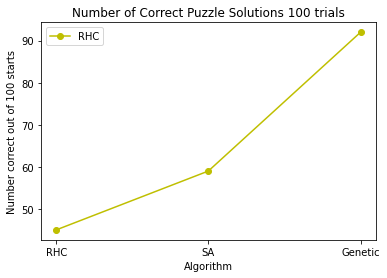

In [99]:
import matplotlib.pyplot as plt

number_correct=[45, 59, 92]



ax=plt.axes()

ax.set_xticks([0,1,2])
ax.set_xticklabels(['RHC','SA','Genetic'])

plt.plot(number_correct,'o-', color="y",
        label="RHC")

#plt.grid()
plt.ylabel('Number correct out of 100 starts')
plt.xlabel('Algorithm')
plt.title("Number of Correct Puzzle Solutions 100 trials")
plt.legend(loc="best")

plt.show()    

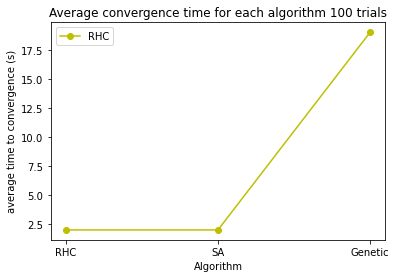

In [102]:
number_correct=[2, 2, 19]


ax=plt.axes()

ax.set_xticks([0,1,2])


ax.set_xticklabels(['RHC','SA','Genetic'])

plt.plot(number_correct,'o-', color="y",
        label="RHC")

#plt.grid()
plt.ylabel('average time to convergence (s)')
plt.xlabel('Algorithm')
plt.title("Average convergence time for each algorithm 100 trials")
plt.legend(loc="best")

plt.show()    

In [16]:
#mimic
#not implemented